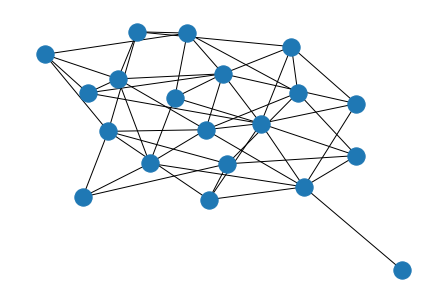

In [3]:
%matplotlib inline
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G) 

In [4]:

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'asleep'
    return state

In [5]:
initial_state(G)

{0: 'asleep',
 1: 'asleep',
 2: 'asleep',
 3: 'asleep',
 4: 'asleep',
 5: 'asleep',
 6: 'asleep',
 7: 'asleep',
 8: 'asleep',
 9: 'asleep',
 10: 'asleep',
 11: 'asleep',
 12: 'asleep',
 13: 'asleep',
 14: 'asleep',
 15: 'asleep',
 16: 'asleep',
 17: 'asleep',
 18: 'asleep',
 19: 'asleep'}

In [6]:
import random

P_AWAKEN = 0.2
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'asleep':
            if random.random() < P_AWAKEN:
                next_state[node] = 'awake'
    return next_state

In [7]:
test_state = initial_state(G)
state_transition(G, test_state)

{6: 'awake', 7: 'awake', 11: 'awake'}

In [9]:
from simulation import Simulation

sim = Simulation(G, initial_state, state_transition, name='Simple Sim')


ModuleNotFoundError: No module named 'simulation'

In [10]:
sim.state()

NameError: name 'sim' is not defined

In [11]:
sim.draw()


NameError: name 'sim' is not defined

In [12]:
sim.run()

NameError: name 'sim' is not defined

In [13]:
sim.steps

NameError: name 'sim' is not defined

In [14]:
sim.draw(with_labels=True)

NameError: name 'sim' is not defined

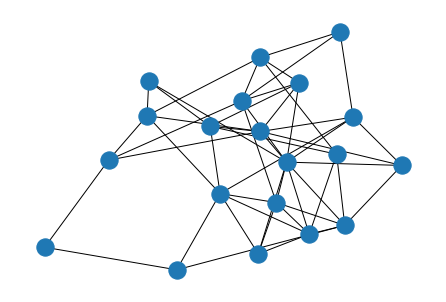

In [15]:
%matplotlib inline
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [17]:
import random
import string

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = random.choice('ABCD')
    return state
initial_state(G)

{0: 'D',
 1: 'B',
 2: 'A',
 3: 'A',
 4: 'A',
 5: 'B',
 6: 'A',
 7: 'C',
 8: 'B',
 9: 'D',
 10: 'B',
 11: 'A',
 12: 'A',
 13: 'B',
 14: 'D',
 15: 'B',
 16: 'A',
 17: 'C',
 18: 'C',
 19: 'B'}

In [29]:
def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
       
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state
test_state = initial_state(G)
state_transition(G, test_state)

{0: 'C',
 1: 'B',
 2: 'A',
 3: 'A',
 4: 'C',
 5: 'C',
 6: 'D',
 7: 'D',
 8: 'C',
 9: 'C',
 10: 'C',
 11: 'C',
 12: 'C',
 13: 'C',
 14: 'D',
 15: 'D',
 16: 'B',
 17: 'D',
 18: 'D',
 19: 'D'}

In [19]:
import matplotlib.pyplot as plt

sim = Simulation(G, initial_state, state_transition, name='Voter Model')
sim.draw()

NameError: name 'Simulation' is not defined

In [20]:
sim.run(40)
sim.draw()

NameError: name 'sim' is not defined

In [21]:
sim.plot()

NameError: name 'sim' is not defined

In [22]:
import random

def state_transition(G, current_state):
    next_state = {}
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            next_state[node] = current_state[neighbor]
    return next_state

In [23]:
def state_transition_async(G, current_state):
    for node in G.nodes:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

In [24]:
def state_transition_async(G, current_state):
    # Randomizing the update order prevents bias
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
    return current_state

In [25]:
sim = Simulation(G, initial_state, state_transition_async, name='Async Voter Model')
sim.run(40)
sim.plot()

NameError: name 'Simulation' is not defined

In [26]:
def stop_condition(G, current_state):
    unique_state_values = set(current_state.values())
    is_stopped = len(unique_state_values) <= 1
    return is_stopped
sim = Simulation(G, initial_state, state_transition, stop_condition, name='Voter model')
sim.run(100)

NameError: name 'Simulation' is not defined

In [27]:
sim.steps

NameError: name 'sim' is not defined

In [28]:
sim.plot()


NameError: name 'sim' is not defined

In [30]:
def state_transition_async_rewiring(G, current_state):
   
    nodes_to_update = list(G.nodes)
    random.shuffle(nodes_to_update)
    for node in nodes_to_update:
        if G.degree(node) > 0:
             
            neighbor = random.choice(list(G.neighbors(node)))
            current_state[node] = current_state[neighbor]
         
            neighbor = random.choice(list(G.neighbors(node)))
            if current_state[node] != current_state[neighbor]:
                G.remove_edge(node, neighbor)
            
    return current_state
sim = Simulation(G, initial_state, state_transition_async_rewiring, stop_condition,
                 name='Voter Model with rewiring')
sim.draw()

NameError: name 'Simulation' is not defined

In [31]:
sim.run(40)
sim.draw()

NameError: name 'sim' is not defined

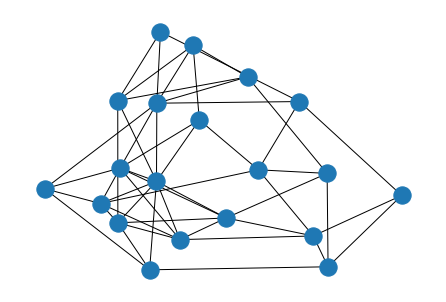

In [32]:
%matplotlib inline
import networkx as nx

G = nx.gnm_random_graph(20, 50)
nx.draw(G)

In [33]:

import random

def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'S'
    
    patient_zero = random.choice(list(G.nodes))
    state[patient_zero] = 'I'
    return state
 

initial_state(G)

{0: 'S',
 1: 'S',
 2: 'S',
 3: 'S',
 4: 'S',
 5: 'S',
 6: 'S',
 7: 'S',
 8: 'S',
 9: 'S',
 10: 'S',
 11: 'S',
 12: 'S',
 13: 'S',
 14: 'I',
 15: 'S',
 16: 'S',
 17: 'S',
 18: 'S',
 19: 'S'}

In [34]:
sim = Simulation(G, initial_state, state_transition, name='SIS model')
sim.draw()

NameError: name 'Simulation' is not defined

In [35]:
sim.run(25)
sim.draw()
sim.plot()

NameError: name 'sim' is not defined